In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(font_scale=1.5)

In [23]:
atmos = pd.read_csv("../build/MSISE00_atmosphere.csv", names=['z', 'O', 'N2', 'O2', 'rho', 'Temp', 'He', 'Ar', 'H', 'N'], header=None)
atmos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   z       1000 non-null   float64
 1   O       1000 non-null   float64
 2   N2      1000 non-null   float64
 3   O2      1000 non-null   float64
 4   rho     1000 non-null   float64
 5   Temp    1000 non-null   float64
 6   He      1000 non-null   float64
 7   Ar      1000 non-null   float64
 8   H       1000 non-null   float64
 9   N       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


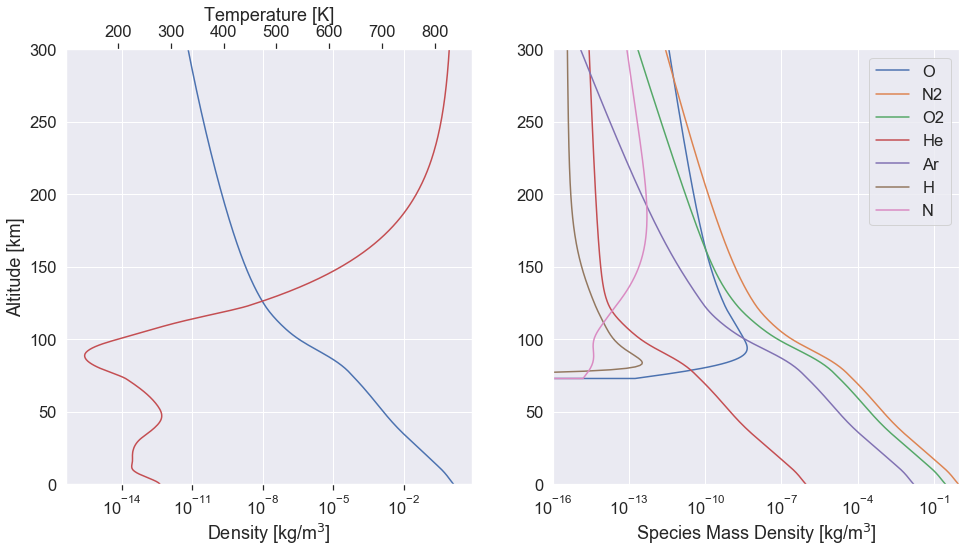

In [51]:
plt.figure(figsize=(16,8)); plt.subplot(1,2,1); plt.grid(True, which='both')
plt.semilogx(atmos.rho, atmos.z);
plt.xlabel('Density [kg/m$^3$]');
plt.ylabel('Altitude [km]');
plt.ylim(0, 300);

ax2 = plt.twiny(); ax2.grid(False)
ax2.plot(atmos.Temp, atmos.z, 'r');
ax2.set_xlabel('Temperature [K]');

plt.subplot(1,2,2); plt.grid(True, which='both')
for name in atmos.keys():
    if (name is not 'z') and (name is not 'Temp') and (name is not 'rho'):
        plt.plot(atmos[name], atmos.z, label=name)
    
plt.legend();
plt.xscale('log')
plt.xlim(1e-16, 1e-0);
plt.ylim(0, 300)
plt.xlabel('Species Mass Density [kg/m$^3$]');

/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


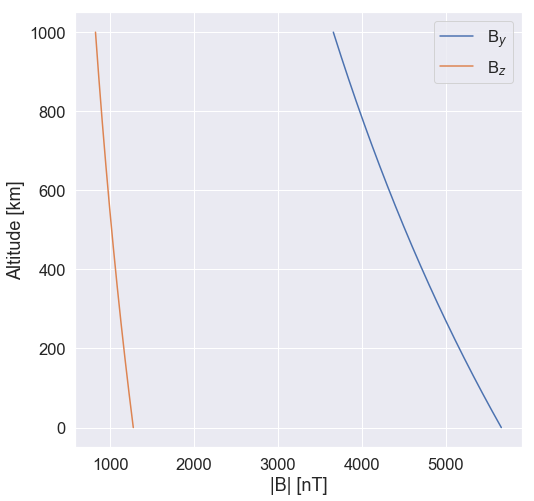

In [78]:
M = 8.06e5; # T-km^3
By = lambda r, mag_lat: M / (6378 + r)**3 * -2 * np.sin(mag_lat)
Bz = lambda r, mag_lat: M / (6378 + r)**3 * np.cos(mag_lat)

plt.figure(figsize=(8,8)); plt.grid(True, which='both')
plt.plot(np.abs(By(atmos.z, np.deg2rad(65.77))) * 1e9, atmos.z, label='B$_y$')
plt.plot(np.abs(Bz(atmos.z, np.deg2rad(65.77))) * 1e9, atmos.z, label='B$_z$');
plt.legend();
plt.xlabel('|B| [nT]');
plt.ylabel('Altitude [km]');